43.647502022538525
44.0991732175215
44.55084441250449
45.002515607487474
45.45418680247045
43.87460592237933
44.32501406431579
44.775422206252244
45.2258303481887
45.67623849012516
44.101688825008985
44.55084441250449
45.0
45.44915558749551
45.898311174991015
44.328750943597214
44.776664368672485
45.224577793747756
45.672491218823026
46.1204046438983
44.555792488268104
45.002474037881804
45.44915558749551
45.89583713710922
46.34251868672292



44.6817701254786
45.0
45.3182298745214
45.6364597490428
45.9546896235642
44.5226551882179
44.8408850627393
45.159114937260696
45.477344811782096
45.795574686303496
44.3635402509572
44.6817701254786
45.0
45.3182298745214
45.6364597490428
44.204425313696504
44.522655188217904
44.840885062739304
45.1591149372607
45.4773448117821
44.0453103764358
44.3635402509572
44.6817701254786
45.0
45.3182298745214


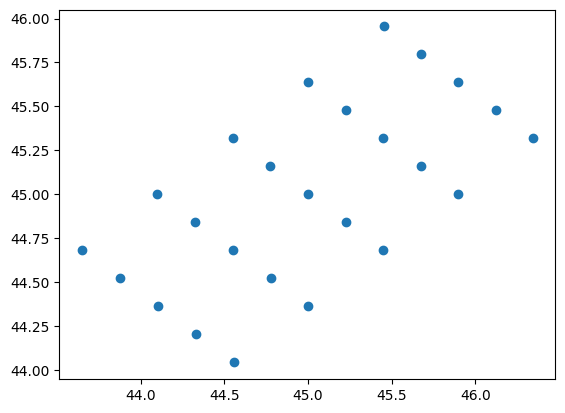

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#this function gives the coordinates of each grid point at variable x and y extends. 


latitudes=[]
longitudes=[]


def strike_coords(strike, event_lat, event_long,extend):
    y_dist=extend * (np.cos(np.deg2rad(strike)))
    new_lat= event_lat + (y_dist/111.1)
    x_dist=extend * (np.sin(np.deg2rad(strike)))
    denom = 111.32 * np.cos(np.deg2rad(event_lat))
    if np.abs(denom) < 1e-2:
        new_long = event_long  # No reliable longitude change, would result in unsuitable values
    else:
        new_long = event_long + (x_dist / denom)

    return new_lat, new_long

def strike_coords_list(strike, event_lat, event_long,extend, gridsize):
    lat_long_list=[]
    grid_list=np.arange(0,1,gridsize, dtype=float)
    rev_grid_list=grid_list[::-1]
    for j in rev_grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, (-1)*extend*(j + gridsize)))
    lat_long_list.append(strike_coords(strike, event_lat, event_long, 0))
    for i in grid_list:
        lat_long_list.append(strike_coords(strike, event_lat, event_long, extend*(i + gridsize)))
    
    return lat_long_list

def strike_coords_grid_list(strike, event_lat, event_long, x_extend, y_extend, gridsize):
    grid_list=[]
    temp=[]
    strike_perpendicular = (strike + 90) % 360
    strike_perpendicular_list=strike_coords_list( strike_perpendicular, event_lat, event_long, y_extend, gridsize)
    for i in strike_perpendicular_list:
        temp=strike_coords_list(strike, i[0], i[1], x_extend, gridsize)
        grid_list.append(temp)
        temp=[]
    return grid_list


a =strike_coords_list(45, 45, 45, 100, 0.5) 
strike = 45
event_lat=45
event_long=45
x_extend=100
y_extend=50
gridsize=0.5
#strike_perpendicular_list=strike_coords_list(strike, event_lat, event_long, extend, gridsize)
#print(strike_perpendicular_list)
#print("\n\n")
grid_list=strike_coords_grid_list(strike, event_lat, event_long, x_extend, y_extend, gridsize)

#grid_list

latitudes = [coord[0] for row in grid_list for coord in row]
longitudes = [coord[1] for row in grid_list for coord in row]

#print(len(latitudes))
#print(latitudes)

for i in longitudes:
        print(i)

print("\n\n")
for i in latitudes:
        print(i)



plt.scatter(longitudes, latitudes)
plt.show()






